In [69]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [54]:
#Train data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [55]:
training_set = train_datagen.flow_from_directory(
        'trainning_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 5002 images belonging to 5 classes.


In [56]:
#Test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'testing_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 998 images belonging to 5 classes.


In [57]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [58]:
#Building model

In [59]:
#Define the convolution neural network
cnn = Sequential()   

In [60]:
#Building convulution layer
cnn.add(Conv2D(filters=64 , kernel_size=3 , activation='relu' , input_shape=[64,64,3]))
cnn.add(MaxPool2D(pool_size=2,strides=2))

In [61]:
cnn.add(Conv2D(filters=64 , kernel_size=3 , activation='relu' ))
cnn.add(MaxPool2D(pool_size=2 , strides=2))

In [62]:
cnn.add(Dropout(0.5))

In [63]:
cnn.add(Flatten())

In [64]:
cnn.add(Dense(units=128, activation='relu'))

In [65]:
cnn.add(Dense(units=5 , activation='softmax'))

In [66]:
cnn.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [67]:
cnn.fit(x = training_set , validation_data = test_set , epochs = 30)

Epoch 1/30


2023-05-21 12:23:03.223499: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


157/157 [==============================] - ETA: 0s - loss: 1.2650 - accuracy: 0.4792

2023-05-21 12:24:09.251014: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


157/157 [==============================] - 75s 468ms/step - loss: 1.2650 - accuracy: 0.4792 - val_loss: 1.0000 - val_accuracy: 0.6012
Epoch 2/30
157/157 [==============================] - 88s 562ms/step - loss: 1.0455 - accuracy: 0.5908 - val_loss: 1.0022 - val_accuracy: 0.6032
Epoch 3/30
157/157 [==============================] - 83s 527ms/step - loss: 0.9334 - accuracy: 0.6421 - val_loss: 0.8016 - val_accuracy: 0.6904
Epoch 4/30
157/157 [==============================] - 76s 485ms/step - loss: 0.8450 - accuracy: 0.6777 - val_loss: 0.8026 - val_accuracy: 0.6814
Epoch 5/30
157/157 [==============================] - 81s 517ms/step - loss: 0.7811 - accuracy: 0.7019 - val_loss: 0.6726 - val_accuracy: 0.7385
Epoch 6/30
157/157 [==============================] - 76s 481ms/step - loss: 0.7166 - accuracy: 0.7269 - val_loss: 0.5119 - val_accuracy: 0.8066
Epoch 7/30
157/157 [==============================] - 70s 447ms/step - loss: 0.6711 - accuracy: 0.7439 - val_loss: 0.4314 - val_accuracy: 0.8

In [74]:
#Get the model accuracy on the test set
test_evaluation = cnn.evaluate(test_set)
print("Test Set Accuracy:", test_evaluation[1])

2023-05-21 13:12:32.625808: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


32/32 [==============================] - 6s 186ms/step - loss: 0.0644 - accuracy: 0.9749
Test Set Accuracy: 0.9749498963356018


Epoch 1/30


2023-05-21 13:15:59.218981: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


157/157 [==============================] - ETA: 0s - loss: 0.2025 - accuracy: 0.9356

2023-05-21 13:17:04.218658: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


157/157 [==============================] - 73s 463ms/step - loss: 0.2025 - accuracy: 0.9356 - val_loss: 0.0456 - val_accuracy: 0.9860
Epoch 2/30
157/157 [==============================] - 75s 480ms/step - loss: 0.1896 - accuracy: 0.9356 - val_loss: 0.0902 - val_accuracy: 0.9739
Epoch 3/30
157/157 [==============================] - 75s 477ms/step - loss: 0.2008 - accuracy: 0.9336 - val_loss: 0.0371 - val_accuracy: 0.9910
Epoch 4/30
157/157 [==============================] - 80s 508ms/step - loss: 0.1908 - accuracy: 0.9394 - val_loss: 0.0307 - val_accuracy: 0.9900
Epoch 5/30
157/157 [==============================] - 74s 469ms/step - loss: 0.1819 - accuracy: 0.9382 - val_loss: 0.1083 - val_accuracy: 0.9669
Epoch 6/30
157/157 [==============================] - 74s 470ms/step - loss: 0.1661 - accuracy: 0.9448 - val_loss: 0.0280 - val_accuracy: 0.9940
Epoch 7/30
157/157 [==============================] - 72s 462ms/step - loss: 0.1595 - accuracy: 0.9458 - val_loss: 0.0247 - val_accuracy: 0.9

2023-05-21 13:53:57.422454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


157/157 [==============================] - ETA: 0s - loss: 0.1055 - accuracy: 0.9668

2023-05-21 13:55:08.147676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


157/157 [==============================] - 78s 500ms/step - loss: 0.1055 - accuracy: 0.9668 - val_loss: 0.0087 - val_accuracy: 0.9970
Epoch 2/30
157/157 [==============================] - 76s 485ms/step - loss: 0.0990 - accuracy: 0.9680 - val_loss: 0.0290 - val_accuracy: 0.9930
Epoch 3/30
157/157 [==============================] - 74s 469ms/step - loss: 0.1103 - accuracy: 0.9670 - val_loss: 0.0168 - val_accuracy: 0.9940
Epoch 4/30
157/157 [==============================] - 82s 520ms/step - loss: 0.1026 - accuracy: 0.9686 - val_loss: 0.0266 - val_accuracy: 0.9930
Epoch 5/30
157/157 [==============================] - 77s 491ms/step - loss: 0.0963 - accuracy: 0.9688 - val_loss: 0.0115 - val_accuracy: 0.9950
Epoch 6/30
157/157 [==============================] - 85s 539ms/step - loss: 0.1047 - accuracy: 0.9710 - val_loss: 0.0103 - val_accuracy: 0.9960
Epoch 7/30
157/157 [==============================] - 78s 494ms/step - loss: 0.1071 - accuracy: 0.9684 - val_loss: 0.0176 - val_accuracy: 0.9

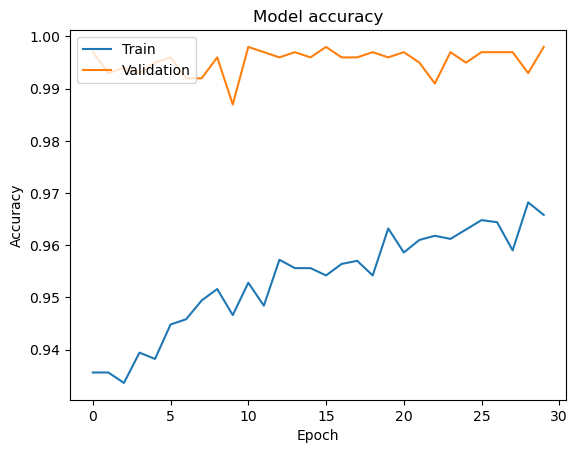

In [76]:
#Check overfitting
plt.plot(cnn.fit(x = training_set , validation_data = test_set , epochs = 30).history['accuracy'])
plt.plot(cnn.fit(x = training_set , validation_data = test_set , epochs = 30).history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [ ]:
#We want to test the model on a image of a tulip in the prediction file

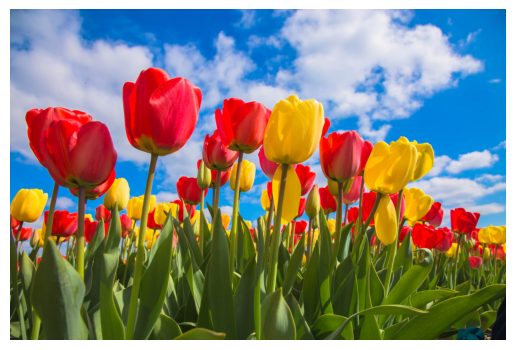

In [70]:
# Load and display the image
image = plt.imread('Prediction/tu.jpeg')
plt.imshow(image)
plt.axis('off')  # Remove axes
plt.show()

In [47]:
test_image = load_img('Prediction/tu.jpeg',target_size=(64,64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

1/1 [==============================] - 0s 21ms/step


{'Lilly': 0, 'Lotus': 1, 'Orchid': 2, 'Sunflower': 3, 'Tulip': 4}

In [ ]:
result = cnn.predict(test_image)
training_set.class_indices

In [48]:
print(result)

[[0. 0. 0. 0. 1.]]


In [49]:
if result[0][0]==1:
    print('Lilly')
elif result[0][1]==1:
    print('Lotus')
elif result[0][2]==1:
    print('Orchid')
elif result[0][3]==1:
    print('SunFlower')
elif result[0][4]==1:
    print("Tulip")

Tulip
